In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Credit Card Fraud Risk Analysis.csv')

In [7]:
df.head()

,Transaction ID,Customer Name,Merchant Name,Transaction Date,Transaction Amount (INR),Fraud Risk,Fraud Type,State,Card Type,Bank,IsFraud,Fraud Score,Transaction Category,Merchant Location
0,17797619,Pihu Manne,Uber,2024-11-10,11673,Medium,Card Not Present,Telangana,Rupay,ICICI Bank,0,57,Transportation,Bangalore
1,50040671,Hiran Vaidya,Zomato,2024-05-20,16594,Medium,Phishing,Maharashtra,Amex,SBI,0,10,Groceries,Bangalore
2,88177651,Shalv Vasa,Myntra,2024-05-28,23347,Medium,Card Skimming,Uttar Pradesh,Visa,HDFC Bank,0,55,Transportation,Ahmedabad
3,24228305,Taran Shanker,Lifestyle,2024-01-09,20753,Low,Card Skimming,Kerala,Visa,Federal Bank,0,30,E-commerce,Lucknow
4,87307869,Shanaya Kara,Tata Cliq,2024-07-27,6432,Low,Card Skimming,Delhi,Amex,SBI,0,86,Electronics,Hyderabad


In [13]:
df.shape

(1000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Transaction ID            1000 non-null   int64 
 1   Customer Name             1000 non-null   object
 2   Merchant Name             1000 non-null   object
 3   Transaction Date          1000 non-null   object
 4   Transaction Amount (INR)  1000 non-null   int64 
 5   Fraud Risk                1000 non-null   object
 6   Fraud Type                1000 non-null   object
 7   State                     1000 non-null   object
 8   Card Type                 1000 non-null   object
 9   Bank                      1000 non-null   object
 10  IsFraud                   1000 non-null   int64 
 11  Fraud Score               1000 non-null   int64 
 12  Transaction Category      1000 non-null   object
 13  Merchant Location         1000 non-null   object
dtypes: int64(4), object(10)
m

In [15]:
df.describe()

,Transaction ID,Transaction Amount (INR),IsFraud,Fraud Score
count,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,5.486023e+07,12226.843000,0.286000,53.179000
std,2.616482e+07,7106.084734,0.452115,25.723815
min,1.003645e+07,141.000000,0.000000,10.000000
25%,3.235345e+07,6218.000000,0.000000,29.000000
50%,5.379576e+07,11999.500000,0.000000,54.000000
75%,7.790521e+07,18207.750000,1.000000,76.000000
max,9.994398e+07,24993.000000,1.000000,95.000000


In [27]:
df.isnull().sum()

Transaction ID              0
Customer Name               0
Merchant Name               0
Transaction Date            0
Transaction Amount (INR)    0
Fraud Risk                  0
Fraud Type                  0
State                       0
Card Type                   0
Bank                        0
IsFraud                     0
Fraud Score                 0
Transaction Category        0
Merchant Location           0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [37]:
df['Fraud Score'].describe()

count    1000.000000
mean       53.179000
std        25.723815
min        10.000000
25%        29.000000
50%        54.000000
75%        76.000000
max        95.000000
Name: Fraud Score, dtype: float64

<Axes: xlabel='Fraud Risk', ylabel='count'>

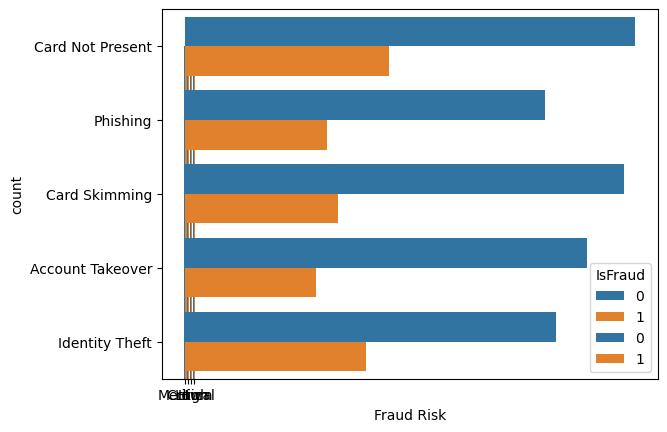

In [45]:
sns.countplot(data=df, x='Fraud Risk', hue='IsFraud')
sns.countplot(data=df,y='Fraud Type',hue='IsFraud')

In [47]:
df['Transaction Date']=pd.to_datetime(df['Transaction Date'])

In [51]:
df['Transaction Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Transaction Date
Non-Null Count  Dtype         
--------------  -----         
1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [53]:
df['Transaction Month']=df['Transaction Date'].dt.to_period('M')

In [55]:
df['Transaction Month']

0      2024-11
1      2024-05
2      2024-05
3      2024-01
4      2024-07
        ...   
995    2024-05
996    2024-10
997    2024-11
998    2024-08
999    2024-05
Name: Transaction Month, Length: 1000, dtype: period[M]

<Axes: xlabel='Transaction Month'>

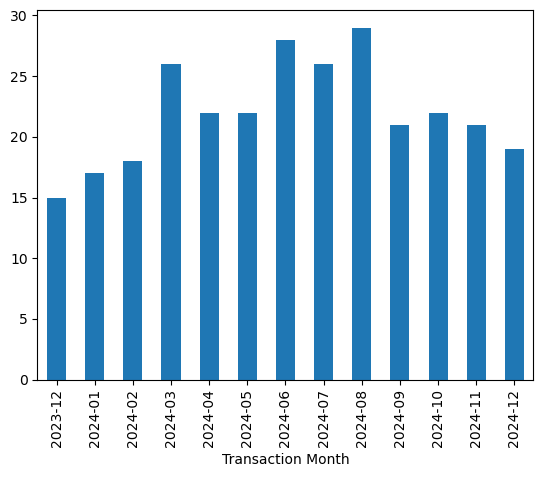

In [57]:
df.groupby('Transaction Month')['IsFraud'].sum().plot(kind='bar')

<Axes: >

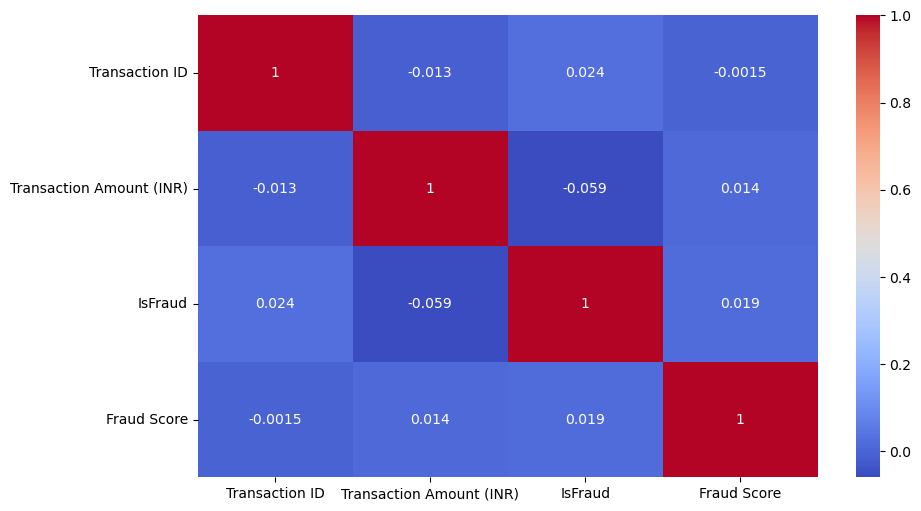

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

IsFraud
0    71.4
1    28.6
Name: proportion, dtype: float64


<Axes: xlabel='IsFraud', ylabel='count'>

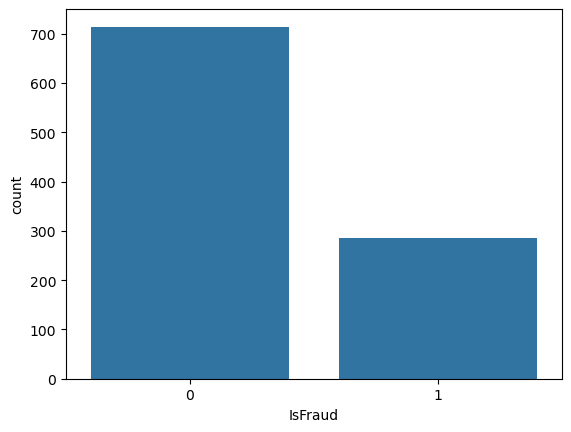

In [63]:
fraud_count = df['IsFraud'].value_counts(normalize=True) * 100
print(fraud_count)
sns.countplot(data=df, x='IsFraud')

<Axes: ylabel='State'>

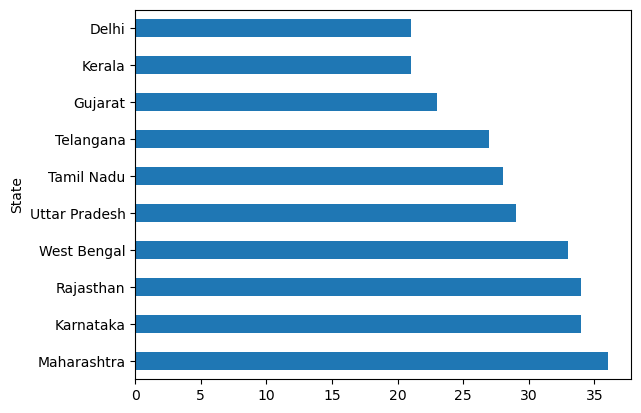

In [65]:
df[df['IsFraud'] == 1]['State'].value_counts().head(10).plot(kind='barh')

<Axes: ylabel='Merchant Location'>

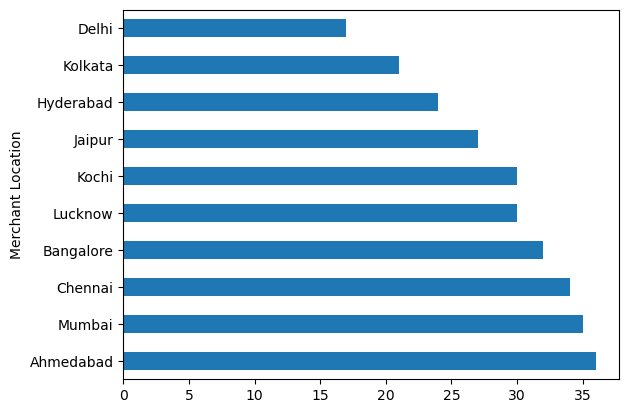

In [67]:
df[df['IsFraud'] == 1]['Merchant Location'].value_counts().head(10).plot(kind='barh')

In [69]:
pd.crosstab(df['Fraud Risk'], df['Fraud Type'])

Fraud Type,Account Takeover,Card Not Present,Card Skimming,Identity Theft,Phishing
Fraud Risk,,,,,
Critical,18,25,25,28,11
High,40,35,41,46,34
Low,77,101,78,73,71
Medium,53,70,65,48,61


<Axes: xlabel='Card Type', ylabel='count'>

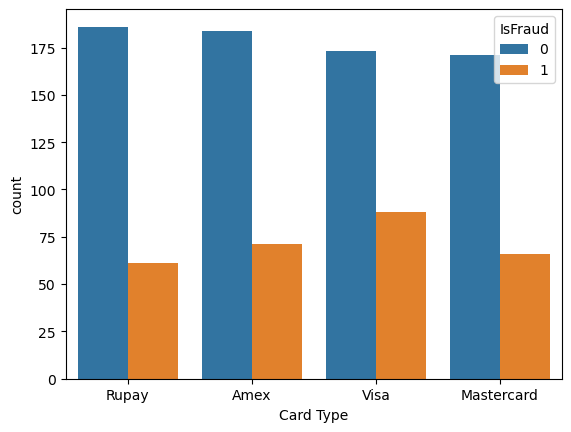

In [71]:
sns.countplot(data=df, x='Card Type', hue='IsFraud')

<Axes: xlabel='Bank', ylabel='count'>

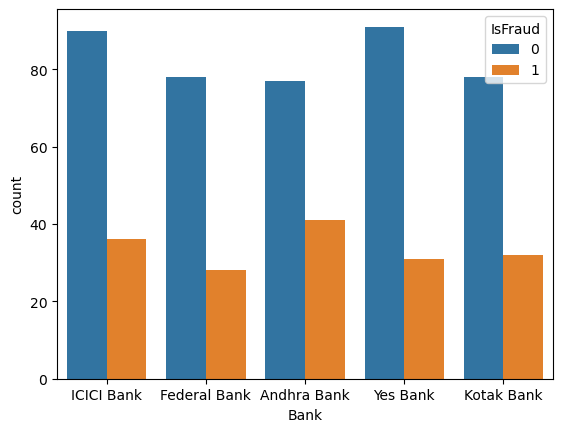

In [79]:
top_banks = df['Bank'].value_counts().head(5).index
sns.countplot(data=df[df['Bank'].isin(top_banks)], x='Bank', hue='IsFraud')